In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')

### Read All-NBA data from Wikipedia

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/All-NBA_Team', header=None)

In [3]:
df = df[7]

In [4]:
df.head()

Season              First team                             Second team  \
    Season                 Players               Teams             Players   
0  1988–89        Karl Malone* (2)           Utah Jazz        Tom Chambers   
1  1988–89    Charles Barkley* (4)  Philadelphia 76ers       Chris Mullin*   
2  1988–89  Akeem Olajuwon* (4)[c]     Houston Rockets  Patrick Ewing* (2)   
3  1988–89     Michael Jordan* (4)       Chicago Bulls  John Stockton* (2)   
4  1988–89      Magic Johnson* (8)  Los Angeles Lakers       Kevin Johnson   

                                      Third team                       
                   Teams                 Players                Teams  
0           Phoenix Suns  Dominique Wilkins* (4)        Atlanta Hawks  
1  Golden State Warriors      Terry Cummings (2)      Milwaukee Bucks  
2        New York Knicks      Robert Parish* (2)       Boston Celtics  
3              Utah Jazz              Dale Ellis  Seattle SuperSonics  
4           Phoenix Suns              Mark Price  Cleveland Cavaliers

### Cleanup All-NBA Data

In [5]:
df.columns = df.columns.droplevel() # Drop first levl of header

df.drop('Teams', axis = 1, inplace= True) # Drop the Team columns

In [6]:
df.head()

,Season,Players,Players,Players
0,1988–89,Karl Malone* (2),Tom Chambers,Dominique Wilkins* (4)
1,1988–89,Charles Barkley* (4),Chris Mullin*,Terry Cummings (2)
2,1988–89,Akeem Olajuwon* (4)[c],Patrick Ewing* (2),Robert Parish* (2)
3,1988–89,Michael Jordan* (4),John Stockton* (2),Dale Ellis
4,1988–89,Magic Johnson* (8),Kevin Johnson,Mark Price


In [7]:
df.columns = ['season', 'first_team', 'second_team', 'third_team' ]

In [8]:
df.head()

,season,first_team,second_team,third_team
0,1988–89,Karl Malone* (2),Tom Chambers,Dominique Wilkins* (4)
1,1988–89,Charles Barkley* (4),Chris Mullin*,Terry Cummings (2)
2,1988–89,Akeem Olajuwon* (4)[c],Patrick Ewing* (2),Robert Parish* (2)
3,1988–89,Michael Jordan* (4),John Stockton* (2),Dale Ellis
4,1988–89,Magic Johnson* (8),Kevin Johnson,Mark Price


In [9]:
#Strip () and [] from names

df['first_team'] = df['first_team'].apply(lambda x: re.sub(r'\([^)]*\)', '', x)).apply(lambda x: re.sub(r'\[[^)]*\]', '', x)).apply(lambda x: x.replace('^', ''))
df['second_team'] = df['second_team'].apply(lambda x: re.sub(r'\([^)]*\)', '', x)).apply(lambda x: re.sub(r'\[[^)]*\]', '', x)).apply(lambda x: x.replace('^', ''))
df['third_team'] = df['third_team'].apply(lambda x: re.sub(r'\([^)]*\)', '', x)).apply(lambda x: re.sub(r'\[[^)]*\]', '', x)).apply(lambda x: x.replace('^', ''))

In [10]:
df.head()

,season,first_team,second_team,third_team
0,1988–89,Karl Malone*,Tom Chambers,Dominique Wilkins*
1,1988–89,Charles Barkley*,Chris Mullin*,Terry Cummings
2,1988–89,Akeem Olajuwon*,Patrick Ewing*,Robert Parish*
3,1988–89,Michael Jordan*,John Stockton*,Dale Ellis
4,1988–89,Magic Johnson*,Kevin Johnson,Mark Price


### Data Engineering to prepare for Machine Learning

In [11]:
df['1st'] = '1st'
df['2nd'] = '2nd'
df['3rd'] = '3rd' 

In [12]:
df1st = pd.DataFrame()
df2nd = pd.DataFrame()
df3rd = pd.DataFrame()
df1st[['season', 'player', 'all_nba_team']] = df[['season', 'first_team', '1st']]
df2nd[['season', 'player', 'all_nba_team']] = df[['season', 'second_team', '2nd']]
df3rd[['season', 'player', 'all_nba_team']] = df[['season', 'third_team', '3rd']]

In [13]:
all_nba_df = df1st.append([df2nd, df3rd], ignore_index=True)

In [14]:
all_nba_df.head()

,season,player,all_nba_team
0,1988–89,Karl Malone*,1st
1,1988–89,Charles Barkley*,1st
2,1988–89,Akeem Olajuwon*,1st
3,1988–89,Michael Jordan*,1st
4,1988–89,Magic Johnson*,1st


### Further cleaning up ALL-NBA data 

In [15]:
def remove_trail_space(player):
    if player[-1] == ' ':
        player = player[0:-1]
        return player
    else:
        return player
    
all_nba_df['player'] = all_nba_df['player'].apply(remove_trail_space)

#Clean up players with dfferent names

all_nba_df['season'] = all_nba_df['season'].apply(lambda x: x.replace('–', '-'))
all_nba_df['player'] = all_nba_df['player'].apply(lambda x: x.replace('*', ''))

all_nba_df['player'].loc[all_nba_df['player'] == 'Amare Stoudemire'] = 'Amar\'e Stoudemire' 

all_nba_df['player'].loc[all_nba_df['player'] == 'Akeem Olajuwon'] = 'Hakeem Olajuwon'

all_nba_df['player'].loc[all_nba_df['player'] == 'Penny Hardaway'] = 'Anfernee Hardaway'

all_nba_df['player'].loc[all_nba_df['player'] == 'Ron Artest'] = 'Metta World Peace'

all_nba_df.head()

,season,player,all_nba_team
0,1988-89,Karl Malone,1st
1,1988-89,Charles Barkley,1st
2,1988-89,Hakeem Olajuwon,1st
3,1988-89,Michael Jordan,1st
4,1988-89,Magic Johnson,1st


## Read historiacal NBA stats (1989 - 2020)

In [16]:
nba_df = pd.read_csv('nba_data_scrape')

In [17]:
nba_df.head()

,player,age,tm,season_start,season,g,gs,mp,fg,fga,...,obpm,dbpm,bpm,vorp,debut,years_pro,player_id,salary,salary cap,%_of_cap
0,Steven Adams,26,OKC,2019,2019-20,58,58,1564,262,443,...,2.1,1.1,3.2,2.0,2013,7,stevenadams,25842700.0,109140000.0,0.236785
1,Bam Adebayo,22,MIA,2019,2019-20,65,65,2235,408,719,...,1.6,2.1,3.6,3.2,2017,3,bamadebayo,3454080.0,109140000.0,0.031648
2,LaMarcus Aldridge,34,SAS,2019,2019-20,53,53,1754,391,793,...,1.8,-0.5,1.3,1.5,2006,14,lamarcusaldridge,26000000.0,109140000.0,0.238226
3,Nickeil Alexander-Walker,21,NOP,2019,2019-20,41,0,501,77,227,...,-3.5,-1.4,-4.9,-0.4,2019,1,nickeilalexanderwalker,2964840.0,109140000.0,0.027165
4,Grayson Allen,24,MEM,2019,2019-20,30,0,498,79,176,...,-1.0,-1.5,-2.6,-0.1,2018,2,graysonallen,2429400.0,109140000.0,0.022260


### Add per game statitics to Dataframe (pts/g, ast/g, etc.)

In [18]:
columns = ['mp', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
for column in columns:
    nba_df[column+'/g'] = round(nba_df[column]/nba_df.g, 1)

### Merge Databases

In [19]:
nba_df = pd.merge(nba_df, all_nba_df, how = 'left', on = ['player', 'season'])

In [20]:
nba_df.head()

,player,age,tm,season_start,season,g,gs,mp,fg,fga,...,orb/g,drb/g,trb/g,ast/g,stl/g,blk/g,tov/g,pf/g,pts/g,all_nba_team
0,Steven Adams,26,OKC,2019,2019-20,58,58,1564,262,443,...,3.4,6.0,9.4,2.4,0.9,1.1,1.5,1.9,10.9,NaN
1,Bam Adebayo,22,MIA,2019,2019-20,65,65,2235,408,719,...,2.5,8.0,10.5,5.1,1.2,1.3,2.8,2.5,16.2,NaN
2,LaMarcus Aldridge,34,SAS,2019,2019-20,53,53,1754,391,793,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,NaN
3,Nickeil Alexander-Walker,21,NOP,2019,2019-20,41,0,501,77,227,...,0.2,1.8,2.0,1.8,0.3,0.2,1.0,1.1,5.1,NaN
4,Grayson Allen,24,MEM,2019,2019-20,30,0,498,79,176,...,0.2,2.0,2.2,1.4,0.2,0.0,0.8,1.2,7.4,NaN


### Replace non-winners (NAN) with NO

In [21]:
nba_df.all_nba_team.fillna('no', inplace = True)

# Data Visualization 

[Text(0, 0, 'N/A'), Text(0, 0, '1st'), Text(0, 0, '2nd'), Text(0, 0, '3rd')]

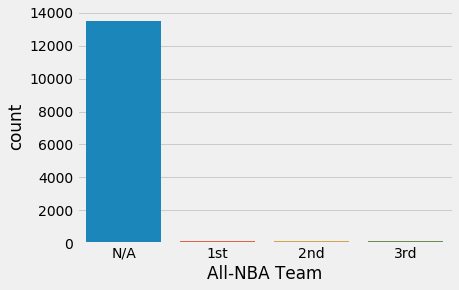

In [22]:
c = sns.countplot(x = 'all_nba_team', data = nba_df)
plt.xlabel('All-NBA Team')
c.set_xticklabels(['N/A', '1st', '2nd', '3rd'])

Data is heavily skewed towards non-winners. This make sense as there are only 15 All-NBA recipients per year 

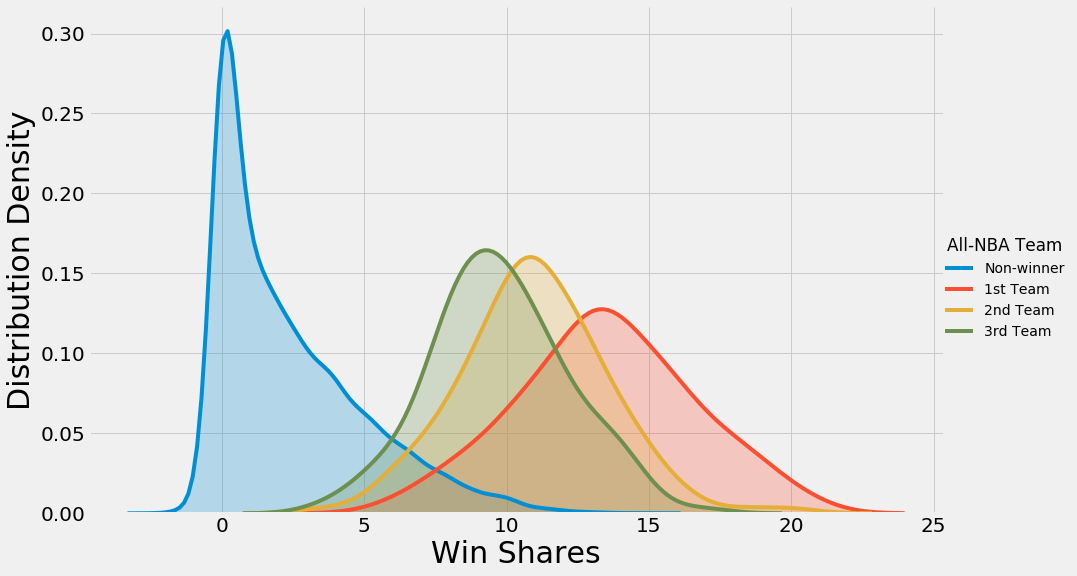

In [23]:
g = sns.FacetGrid(nba_df, hue = "all_nba_team", height = 8, aspect = 1.6)
g = g.map(sns.kdeplot, "ws", shade = True).add_legend()
plt.xlabel('Win Shares', fontsize = 30)
plt.ylabel('Distribution Density', fontsize = 30)
g._legend.set_title("All-NBA Team")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# replace labels
new_labels = ['Non-winner', '1st Team', '2nd Team', '3rd Team']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


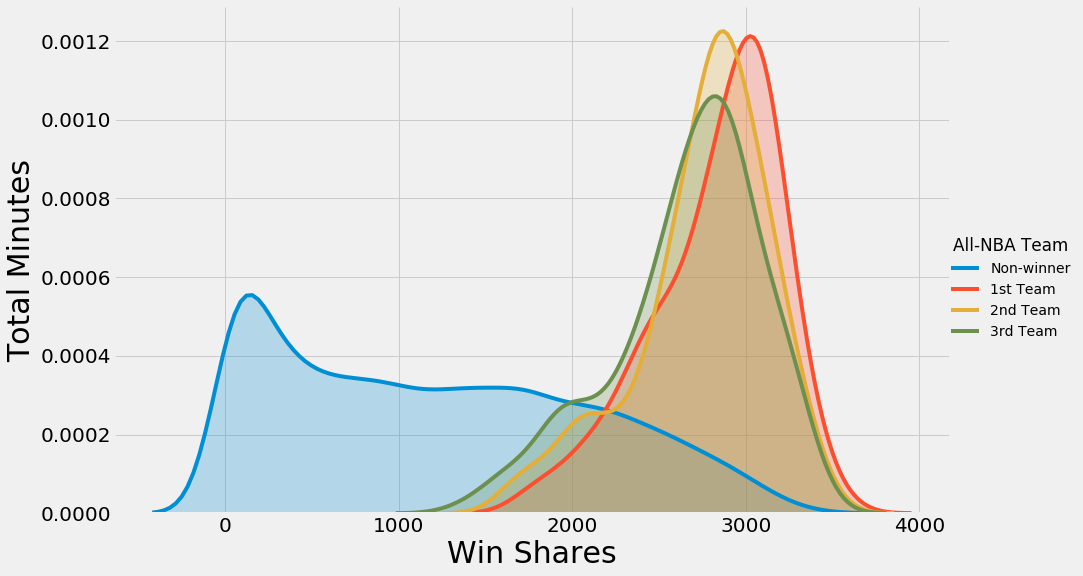

In [24]:
g = sns.FacetGrid(nba_df, hue = "all_nba_team", height = 8, aspect = 1.6)
g = g.map(sns.kdeplot, "mp", shade = True).add_legend()
plt.xlabel('Win Shares', fontsize = 30)
plt.ylabel('Total Minutes', fontsize = 30)
g._legend.set_title("All-NBA Team")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# replace labels
new_labels = ['Non-winner', '1st Team', '2nd Team', '3rd Team']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


We will use a cutoff of win share > 4.6 and total minutes played as 1400. We lo

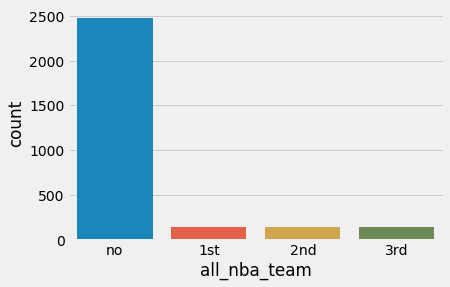

In [25]:
sns.countplot(x = 'all_nba_team', data = nba_df[nba_df.ws > 4.65])

In [26]:
nba_df[(nba_df.ws > 3.4) & (nba_df.mp > 1400) & (nba_df.season != '2019-20')].groupby('all_nba_team')['player'].count()

all_nba_team
1st     150
2nd     150
3rd     150
no     3489
Name: player, dtype: int64

In [27]:
df = nba_df[(nba_df.ws > 3.4) & (nba_df.mp > 1400)& (nba_df.season != '2019-20')]

## Import Machine Learning Libraries

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

### Split dataset into Training and Testing sets

In [29]:
# Select features
features = ['g','fg','2p', '3p', 'ft', 'ts%', 'per', 'ws',
            'bpm', 'vorp','mp/g', 'orb/g', 'drb/g', 'trb/g',
            'ast/g', 'stl/g', 'blk/g', 'pts/g']

In [91]:
X = df[features].values

y = df['all_nba_team']
y_dummy = pd.get_dummies(y).values # One hot encode target variable

X_train, X_test, y_train, y_test = train_test_split(X, y_dummy, test_size=0.30)

# Scale the Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
def model_build(neurons, activation, h_layers, loss):
    # Create model
   
    model = Sequential()
    
    #First hidden layer
    model.add(Dense(neurons, input_dim = X_train.shape[1], activation = activation))
    
    #Extra layers
    if h_layers > 1:
        for i in range(2, h_layers + 1):
            model.add(Dense(neurons,  activation = activation))
    
    #Output layer with softma activation
    model.add(Dense(4, activation='softmax'))
    
    # Compile model
    model.compile(loss = loss, optimizer='adam', metrics=['accuracy'])
    
    return model
    
    

In [94]:
# Define early stop parameter
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor= 'val_loss', mode = 'min',
                           verbose = 0, patience = 25)

### Build CVSearch Grid

In [95]:
estimator = KerasClassifier(build_fn=model_build, epochs=250, batch_size=25, verbose=0)

# define the grid search parameters
activation = ['relu', 'sigmoid']
neurons = [8, 10, 15, 20] 
h_layers = [2,3]
loss_func = ['categorical_crossentropy', 'sparse_categorical_crossentropy', 'kullback_leibler_divergence']
param_grid = dict(activation=activation, neurons=neurons, h_layers=h_layers, loss = loss_func)

grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=1, cv=3)

grid_result = grid.fit(X_train, y_train, validation_data = (X_test, y_test) , callbacks = [early_stop])

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,4].

  FitFailedWarning)


Best: 0.916576 using {'activation': 'relu', 'h_layers': 3, 'loss': 'categorical_crossentropy', 'neurons': 10}
0.913674 (0.005355) with: {'activation': 'relu', 'h_layers': 2, 'loss': 'categorical_crossentropy', 'neurons': 8}
0.910047 (0.004559) with: {'activation': 'relu', 'h_layers': 2, 'loss': 'categorical_crossentropy', 'neurons': 10}
0.910773 (0.005404) with: {'activation': 'relu', 'h_layers': 2, 'loss': 'categorical_crossentropy', 'neurons': 15}
0.908959 (0.003591) with: {'activation': 'relu', 'h_layers': 2, 'loss': 'categorical_crossentropy', 'neurons': 20}
nan (nan) with: {'activation': 'relu', 'h_layers': 2, 'loss': 'sparse_categorical_crossentropy', 'neurons': 8}
nan (nan) with: {'activation': 'relu', 'h_layers': 2, 'loss': 'sparse_categorical_crossentropy', 'neurons': 10}
nan (nan) with: {'activation': 'relu', 'h_layers': 2, 'loss': 'sparse_categorical_crossentropy', 'neurons': 15}
nan (nan) with: {'activation': 'relu', 'h_layers': 2, 'loss': 'sparse_categorical_crossentropy',

### Train best model to get history

In [147]:
best_par = grid_result.best_params_

best_estimator = model_build(neurons = best_par['neurons'], h_layers = best_par['h_layers'], 
                           activation = best_par['activation'], loss = best_par['loss'])
history = best_estimator.fit(X_train, y_train,
                        validation_data=(X_test,y_test),callbacks = [early_stop], epochs = 200,  verbose = 0)

Text(0, 0.5, 'Categorical Cross Entropy')

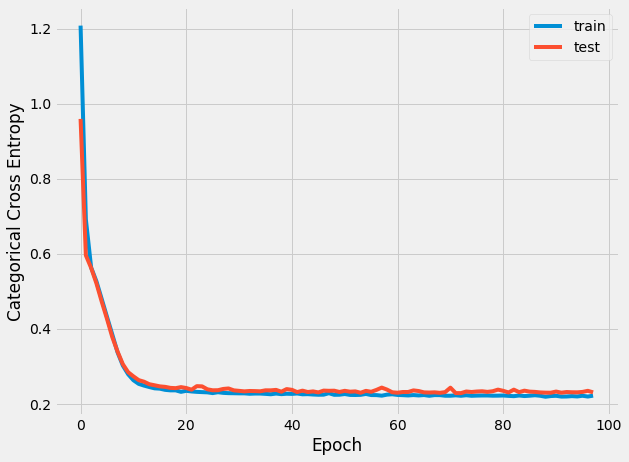

In [148]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Categorical Cross Entropy')


(0.85, 0.95)

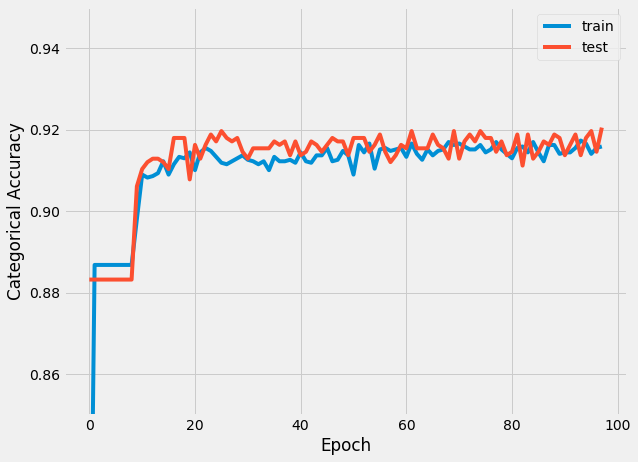

In [149]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Categorical Accuracy')
plt.ylim(.85,.95)

### Model Shape

In [150]:
best_estimator.summary()

Model: "sequential_1721"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4981 (Dense)           (None, 10)                190       
_________________________________________________________________
dense_4982 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_4983 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_4984 (Dense)           (None, 4)                 44        
Total params: 454
Trainable params: 454
Non-trainable params: 0
_________________________________________________________________


### Use model to predict All-NBA Teams for the 2019-20 Season

In [151]:
df_2019 = nba_df[(nba_df.season == '2019-20') & (nba_df.ws > 3.4) & (nba_df.mp > 1000)][features].values
X_2019 = scaler.transform(df_2019)
prediction = best_estimator.predict_proba(X_2019)

In [152]:
pred_df = pd.DataFrame(prediction, columns = ['1st', '2nd', '3rd', 'NA'])

In [154]:
pred_df = pd.merge(nba_df[(nba_df.season == '2019-20') & (nba_df.ws > 3.4) & (nba_df.mp > 1000)] , pred_df, on = pred_df.index)

In [155]:
pred_df.head()

,key_0,player,age,tm,season_start,season,g,gs,mp,fg,...,stl/g,blk/g,tov/g,pf/g,pts/g,all_nba_team,1st,2nd,3rd,NA
0,0,Steven Adams,26,OKC,2019,2019-20,58,58,1564,262,...,0.9,1.1,1.5,1.9,10.9,no,0.000304,0.000597,0.005187,0.993911
1,1,Bam Adebayo,22,MIA,2019,2019-20,65,65,2235,408,...,1.2,1.3,2.8,2.5,16.2,no,0.038363,0.090191,0.186369,0.685076
2,2,LaMarcus Aldridge,34,SAS,2019,2019-20,53,53,1754,391,...,0.7,1.6,1.4,2.4,18.9,no,0.002112,0.004308,0.020811,0.972770
3,3,Jarrett Allen,21,BRK,2019,2019-20,64,58,1647,267,...,0.6,1.3,1.1,2.2,10.6,no,0.000148,0.000290,0.003173,0.996390
4,4,Giannis Antetokounmpo,25,MIL,2019,2019-20,57,57,1763,623,...,1.0,1.0,3.7,3.0,29.6,no,0.827090,0.134337,0.030738,0.007835


### Tabulate votes based on weights

In [157]:
pred_df['tabulate'] = pred_df['1st']*5.0 + pred_df['2nd']*3.0 + pred_df['3rd']*1.0

##  ALL-NBA First Team

In [163]:
pred_df[['player', '1st', '2nd', '3rd','tabulate']].sort_values(by = 'tabulate', ascending = False)[0:5]

,player,1st,2nd,3rd,tabulate
4,Giannis Antetokounmpo,0.827090,0.134337,0.030738,4.569197
41,James Harden,0.776187,0.142429,0.061115,4.369339
56,LeBron James,0.478667,0.430230,0.063873,3.747899
28,Luka Dončić,0.418408,0.446813,0.092463,3.524943
63,Damian Lillard,0.378726,0.429569,0.121518,3.303858


##  ALL-NBA Second Team

In [165]:
pred_df[['player', '1st', '2nd', '3rd','tabulate']].sort_values(by = 'tabulate', ascending = False)[5:10]

,player,1st,2nd,3rd,tabulate
24,Anthony Davis,0.408385,0.315037,0.176640,3.163673
57,Nikola Jokić,0.234764,0.353652,0.209420,2.444193
62,Kawhi Leonard,0.182153,0.292759,0.213931,2.002972
105,Trae Young,0.140110,0.237839,0.200773,1.614839
100,Russell Westbrook,0.106862,0.200377,0.215635,1.351074


##  ALL-NBA Third Team

In [164]:
pred_df[['player', '1st', '2nd', '3rd','tabulate']].sort_values(by = 'tabulate', ascending = False)[10:15]

,player,1st,2nd,3rd,tabulate
17,Jimmy Butler,0.082131,0.166444,0.206421,1.116405
30,Joel Embiid,0.075678,0.155960,0.220753,1.067021
8,Bradley Beal,0.067582,0.135256,0.184895,0.928574
84,Domantas Sabonis,0.051359,0.123249,0.230083,0.856621
101,Hassan Whiteside,0.041325,0.102977,0.233173,0.748726


In [168]:
pred_df[['player', '1st', '2nd', '3rd','NA','tabulate']].sort_values(by = 'tabulate', ascending = False).to_csv(r'All-NBA Votes.csv',index = False, )